# Austin Animal Shelter: What puts an animal at risk of having a longer adoption time?
This analysis is based on [Austin Animal Shelter](http://www.austintexas.gov/department/aac) data from 2014 to 2018. Data are available through [Kaggle](https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes#aac_intakes_outcomes.csv).

## Analysis Outline
### 0. Dataset Overview
> a. Distribution of animal shelter times
### 1. Common Trends in Adoption Times
This portion of the analysis address the majority of dogs in the dataset and serves to identify trends in ***most*** shelter dogs.
> a. Animal type<br>
> b. Dog breed<br>
> c. Dog breed group (AKC)<br>
> d. Mixed breed v. purebreed<br>
> e. Dog age<br>
> f. Black dog syndrome<br>
> g. Coat color<br>
### 2. Long adoption times: Top 5th percentile of adoption times
This portion of the analysis serves to determine what factors may contribute to a dog having an extraoridinarly ***long*** adoption time.
> a. Animal type<br>
> b. Dog breed<br>
> c. Dog breed group (AKC)<br>
> d. Mixed breed v. purebreed<br>
> e. Dog age<br>
> f. Black dog syndrome<br>
> g. Coat color<br>
### 3. Most Popular Adoption Times
> a. Season<br>
> b. Time of day<br>
> c. Day of week<br>

<img src="http://www.austintexas.gov/sites/default/files/aac_logo.jpg" width=400px align="center"><br>
[Image Credit](http://www.austintexas.gov/department/aac)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings; warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('aac_intakes_outcomes.csv', parse_dates=True)

In [3]:
# ecdf function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# 0. Dataset Overview

In [4]:
df.shape

(79672, 41)

In [5]:
df.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79672 entries, 0 to 79671
Data columns (total 41 columns):
age_upon_outcome              79672 non-null object
animal_id_outcome             79672 non-null object
date_of_birth                 79672 non-null object
outcome_subtype               36348 non-null object
outcome_type                  79662 non-null object
sex_upon_outcome              79671 non-null object
age_upon_outcome_(days)       79672 non-null int64
age_upon_outcome_(years)      79672 non-null float64
age_upon_outcome_age_group    79672 non-null object
outcome_datetime              79672 non-null object
outcome_month                 79672 non-null int64
outcome_year                  79672 non-null int64
outcome_monthyear             79672 non-null object
outcome_weekday               79672 non-null object
outcome_hour                  79672 non-null int64
outcome_number                79672 non-null float64
dob_year                      79672 non-null int64
dob_month 

In [7]:
df.outcome_datetime = pd.to_datetime(df.outcome_datetime)

## 0a. Distribution of shelter times
A quick look shows that time in shelter days is not normally distributed and there are long tails in the data.

Text(0, 0.5, 'Time in Shelter (Days)')

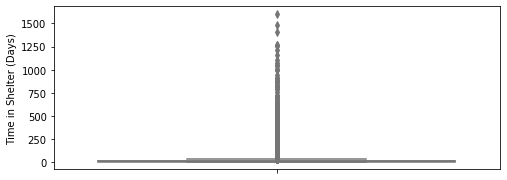

In [8]:
plt.figure(figsize=(8, 3))
ax = sns.boxplot(y='time_in_shelter_days', palette='Paired', data=df)
plt.ylabel('Time in Shelter (Days)')

Here, we see that most of the adoption time data fall to the extreme left end of the axis, with the mean shown in purple and the 95th percentile in blue (~71 days). Looking at the mean and median for shelter times supports this skew of the data to the left: while the median is almost 17 days, the mean is only ~5 days.

In [9]:
mean = np.mean(df.time_in_shelter_days)
median = np.median(df.time_in_shelter_days)
mean, median

(16.75711554526339, 4.987152777777778)

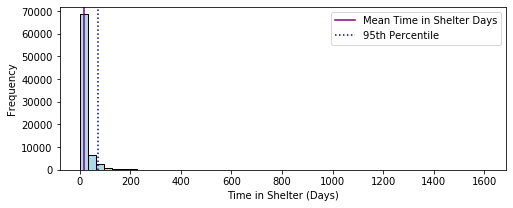

In [10]:
plt.figure(figsize=(8,3))
ax = df.time_in_shelter_days.plot(kind='hist', bins=50, color='LightBlue', ec='black')
ax.axvline(df.time_in_shelter_days.mean(), color='purple')
ax.axvline(df.time_in_shelter_days.quantile(0.95), linestyle=':', color='darkblue')
ax.set_xlabel('Time in Shelter (Days)')
plt.legend(['Mean Time in Shelter Days', '95th Percentile'])

Text(0, 0.5, 'Frequency')

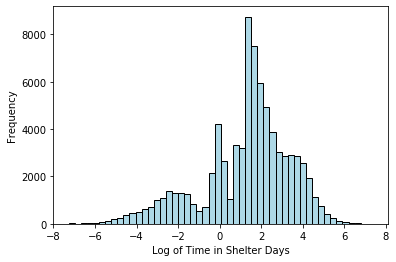

In [325]:
# considering whether I should log transform time in shelter days
df[df.time_in_shelter_days==0] = df[df.time_in_shelter_days==0].replace(0, np.nan)
plt.hist(np.log(df.time_in_shelter_days),bins=50, color='LightBlue', ec='black')
plt.xlabel('Log of Time in Shelter Days')
plt.ylabel('Frequency')

**Since we are particularly interested in this group of animals with long adoption times, we want to look at them independently. I will conduct two analyses:**
1. Adoption times for 95% of the data representing adoption times <71 days
2. Adoption times for our outliers, the highest 5% of the data, representing adoption times >71 days

In [12]:
# We'll use this cutoff to exclude outliers
outliers = df.time_in_shelter_days.quantile(0.95)
outliers

71.10902777777778

Here, we can see 95% of the data and still see an exponential distribution, with most animals being adopted quickly.

Text(0.5, 0, 'Time in Shelter (Days)')

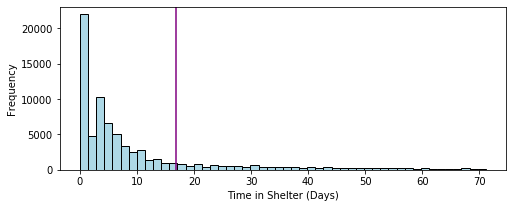

In [13]:
plt.figure(figsize=(8,3))
ax = df[df.time_in_shelter_days<outliers].time_in_shelter_days.plot(kind='hist', bins=50, color='LightBlue', ec='black')
ax.axvline(df.time_in_shelter_days.mean(), color='purple')
ax.set_xlabel('Time in Shelter (Days)')

***

# 1. Common Trends in Adoption Times
This analysis only includes animals with time in shelter days within the 95th percentile, below ~71 days for all animals and ~65 days for only dogs. The point of this analysis is to look at what trends in adoption times exist for a typical animal in the shelter.

In [14]:
df_95 = df[df['time_in_shelter_days']<outliers]

In [15]:
df['animal_type'].unique()

array(['Dog', 'Cat', 'Other', 'Bird'], dtype=object)

In [16]:
dogs_95 = df_95[df_95['animal_type'] == 'Dog']
cats_95 = df_95[df_95['animal_type'] == 'Cat']
birds_95 = df_95[df_95['animal_type'] == 'Bird']
other_95 = df_95[df_95['animal_type'] == 'Other']

## 1a. What animal types have the longest adoption times?

This dataset includes data for dogs, cats, birds, and "other", which include animals such as rabbits.

Text(0, 0.5, 'Time in Shelter (Days)')

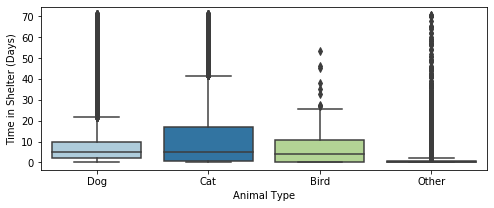

In [17]:
plt.figure(figsize=(8, 3))
ax = sns.boxplot(x='animal_type', y='time_in_shelter_days', palette='Paired', 
                 data=df_95, order=['Dog', 'Cat', 'Bird', 'Other'])
ax.set_xlabel('Animal Type')
plt.ylabel('Time in Shelter (Days)')

#### Dogs are the most common animal type, and birds are very uncommon.

In [18]:
df_95['animal_type'].describe()

count     75687
unique        4
top         Dog
freq      43357
Name: animal_type, dtype: object

Text(0, 0.5, 'Number of Animals')

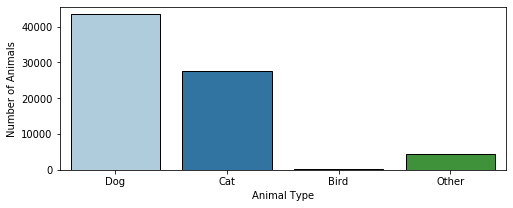

In [19]:
plt.figure(figsize=(8,3))
sns.barplot(x=df_95.groupby('animal_type').count().index, 
            y=df_95.groupby('animal_type').count()['age_upon_outcome'], 
            data=df_95.groupby('animal_type').count(), palette='Paired', 
            ec='black', order=['Dog', 'Cat', 'Bird', 'Other'])
plt.xlabel('Animal Type')
plt.ylabel('Number of Animals')

In [20]:
stats.f_oneway(dogs_95['time_in_shelter_days'], 
               cats_95['time_in_shelter_days'],
               birds_95['time_in_shelter_days'],
               other_95['time_in_shelter_days'])

F_onewayResult(statistic=843.9932928046212, pvalue=0.0)

In [21]:
animals = df_95['animal_type'].unique()
def ttest_all(categorical_list, df_name, categorical_variable, test_variable):
    # run a ttest of each category against all 'others'
    # categorical list = list of the variables to be tested
    # cateogrical_variable and test_variable should be provided as strings
    
    df_list = []
    for i in categorical_list:
        others = df_name[df_name[categorical_variable]!=i]
        i_var = df_name[df_name[categorical_variable]==i]
        i_mean = np.mean(i_var[test_variable])
        o_mean = np.mean(others[test_variable])
        ttest, pvalue = stats.ttest_ind(i_var[test_variable], others[test_variable])
        df_list.append([i, i_mean, o_mean, ttest, pvalue])

    pval = pd.DataFrame(df_list)
    pval.columns = ['Variable', 'Mean', 'Mean of Others', 'T-test Statistic', 'p-value']
    return pval

ttest_all(animals, df_95, 'animal_type', 'time_in_shelter_days')

,Variable,Mean,Mean of Others,T-test Statistic,p-value
0,Dog,9.163792,11.378805,-21.015789,8.962822e-98
1,Cat,12.845390,8.538205,40.073581,0.000000e+00
2,Other,2.408066,10.582225,-36.799732,7.486708e-294
3,Bird,7.601964,10.121194,-3.212683,1.315565e-03


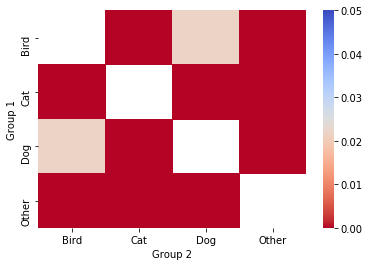

In [22]:
def pairwise_ttest(categorical_list, df_name, category_variable, test_variable, graph=False):
    # run pairwise t-tests across each variable and output as a heatmap of p-values (because it's fun)
    # or as a dataframe (default)

    test_list = []
    for i in range(len(categorical_list)):
        c = categorical_list[i]
        df_c = df_name.loc[df_name[category_variable]==c, test_variable]
        test_list.append(df_c)
    
    df_list = []
    for i, x in enumerate(test_list):
         for j,y in enumerate(test_list):
                if i!=j:
                    name_1 = categorical_list[i]
                    name_2 = categorical_list[j]
                    ttest, pvalue = stats.ttest_ind(x, y)
                    df_list.append([name_1, name_2, ttest, pvalue])

    pval = pd.DataFrame(df_list)
    pval.columns = ['Group 1', 'Group 2', 'Test Statistic', 'p-value']
    pval = pval.pivot('Group 1', 'Group 2', 'p-value')
    
    if graph==False:
        return pval
    else:
        ax = sns.heatmap(pval, cmap='coolwarm_r', vmin=0, vmax=.05)
            
pairwise_ttest(animals, df_95, 'animal_type', 'time_in_shelter_days',  graph=True)

In [23]:
pairwise_ttest(animals, df_95, 'animal_type', 'time_in_shelter_days')

Group 2,Bird,Cat,Dog,Other
Group 1,,,,
Bird,NaN,1.914413e-08,2.193693e-02,1.545838e-31
Cat,1.914413e-08,NaN,1.353010e-237,0.000000e+00
Dog,2.193693e-02,1.353010e-237,NaN,3.749485e-266
Other,1.545838e-31,0.000000e+00,3.749485e-266,NaN


#### All animal types are significantly different from each other. Cats have the longest average adoption time (12.8 days), followed by dogs (9.2 days), birds (7.6 days), then other (2.4 days).

<img src="https://icatcare.org/app/uploads/2018/07/Thinking-of-getting-a-cat.png" width=300px align="left">
<br><br><br><br><br><br><br><br>

[Image Credit](https://icatcare.org/advice/thinking-of-getting-a-cat/)

## 1b - 1g. A closer look at adoption times for man's best friend
For parts 1b - 1g, outliers are defined as the 95th percentile just for dogs, approximately 65 days.

<img src="http://wholesolutionsgroup.com/wp-content/uploads/2016/08/Man-and-Dog--1080x675.jpg" width=400px align=left><br>
<br><br><br><br><br><br><br><br><br><br><br><br>
[Image Credit](http://wholesolutionsgroup.com/why-dogs-are-mans-best-friend/)

In [24]:
dog_outliers = df.loc[df['animal_type']=='Dog', 'time_in_shelter_days'].quantile(0.95)
dog_outliers

65.10583333333332

In [25]:
dogs = df[df['animal_type']=='Dog']
dogs = dogs[dogs['time_in_shelter_days']<dog_outliers]

## 1b. Does dog breed affect adoption time?
In this section, I hypothesized that stereotypically common shelter breeds, such as ***Pit Bulls and Chihuahuas***,  have longer adoption times than other breeds. 

Pit Bulls and Chihuahuas are the most common breeds at this shelter.

In [26]:
dogs['breed'].value_counts().head()

Pit Bull Mix                 5529
Chihuahua Shorthair Mix      4706
Labrador Retriever Mix       4552
German Shepherd Mix          1899
Australian Cattle Dog Mix    1029
Name: breed, dtype: int64

Because many of the animals at this shelter were categorized as mixed breeds, it became impossible to see patterns by breed - there were 1883 unique breed categorizations. To simplify this analysis, I sorted the data such that each breed is a unique column, and each animal has a 1 or 0 based on whether it is in part or full that breed. I further created a mixed breed/purebred column to later analyze whether purebreds are adopted more quickly than mixed breeds.

In [27]:
dogs['breed'].nunique()

1879

In [28]:
# replace slash in Black/Tan Hounds so we can splice mixed breeds into unique breeds
dogs['breed'] = dogs['breed'].str.replace('Black/Tan Hound', 'Black-Tan Hound')
dogs['breed'] = dogs['breed'].str.replace('Dachshund Stan', 'Dachshund')
dogs['breed'] = dogs['breed'].str.replace('Dachshund Wirehair', 'Dachshund')

# combine data for shorthair and longhair chihuahuas
dogs['breed'] = dogs['breed'].str.replace(' Shorthair', '')
dogs['breed'] = dogs['breed'].str.replace(' Longhair', '')

# remove "mix" to get an accurate breed list
dogs['breed_nomix'] = dogs['breed'].str.replace(' Mix', '')

dogs['breed_list'] = dogs['breed_nomix'].str.split('/')

# add a column that specifies mixed breed v. purebreed for later analyses
dogs.loc[dogs.breed_list.str.len()>1, 'mixed_breed'] = 'Mixed Breed'
dogs.loc[dogs['breed'].str.contains('Mix'), 'mixed_breed'] = 'Mixed Breed'
dogs['mixed_breed'] = dogs['mixed_breed'].fillna('Purebred')

In [29]:
has_breeds = pd.get_dummies(dogs['breed_list'].apply(pd.Series).stack()).sum(level=0)

In [30]:
dog_breeds_combined = pd.concat([dogs, has_breeds], axis=1)

In [31]:
breed_melt1 = dog_breeds_combined[['breed_list', 'mixed_breed', 'time_in_shelter_days']]
breed_melt2 = dog_breeds_combined.loc[:, 'Affenpinscher':]
breed_melt = pd.concat([breed_melt1, breed_melt2], axis=1)
dog_breeds = pd.melt(breed_melt, id_vars=['breed_list','mixed_breed','time_in_shelter_days'], 
                       var_name='breed_name', value_name='has_breed')
dog_breeds.loc[dog_breeds['has_breed']==1, 'breed'] = dog_breeds['breed_name']
dog_breeds = dog_breeds.dropna()

In [32]:
dog_breeds.head()

,breed_list,mixed_breed,time_in_shelter_days,breed_name,has_breed,breed
3132,"[Cairn Terrier, Affenpinscher]",Mixed Breed,21.153472,Affenpinscher,1,Affenpinscher
3790,"[Shih Tzu, Affenpinscher]",Mixed Breed,6.000694,Affenpinscher,1,Affenpinscher
5448,[Affenpinscher],Mixed Breed,0.157639,Affenpinscher,1,Affenpinscher
5521,"[Border Terrier, Affenpinscher]",Mixed Breed,5.160417,Affenpinscher,1,Affenpinscher
5538,[Affenpinscher],Mixed Breed,2.056944,Affenpinscher,1,Affenpinscher


Because there are 199 unique dog breeds represented, I've looked only at the 25 most common breeds.

**Of note, Labrador Retrievers, Chihuahuas, and Pit Bulls are substantially more common than the other breeds, by 200%.**

In [33]:
dog_breeds['breed'].nunique()

197

In [34]:
dog_breeds['breed'].value_counts().head(25)

Labrador Retriever       6830
Chihuahua                6612
Pit Bull                 6518
German Shepherd          2889
Dachshund                1914
Australian Cattle Dog    1620
Border Collie            1093
Miniature Poodle         1091
Boxer                    1090
Beagle                    837
Jack Russell Terrier      723
Yorkshire Terrier         715
Catahoula                 696
Australian Shepherd       695
Rat Terrier               694
Siberian Husky            689
Miniature Schnauzer       659
Great Pyrenees            612
Rottweiler                542
Pointer                   523
Shih Tzu                  497
Cairn Terrier             490
Staffordshire             397
Anatol Shepherd           397
American Bulldog          361
Name: breed, dtype: int64

In [35]:
top_25_breeds = dog_breeds['breed'].value_counts().head(25).index

In [36]:
top_25_breed_df = dog_breeds[dog_breeds['breed'].isin(top_25_breeds)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

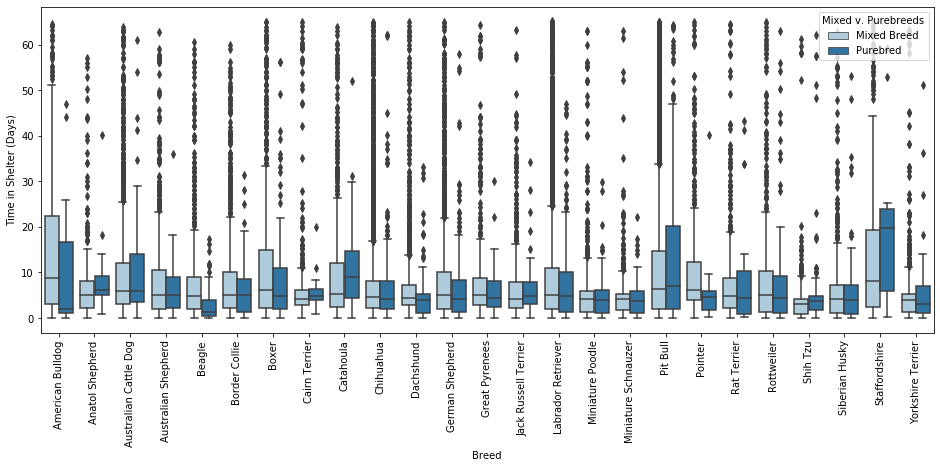

In [37]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='breed', y='time_in_shelter_days', hue='mixed_breed', 
                    data=top_25_breed_df, palette='Paired')
plt.xlabel('Breed')
plt.ylabel('Time in Shelter (Days)')
plt.legend(title='Mixed v. Purebreeds', loc='upper right')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

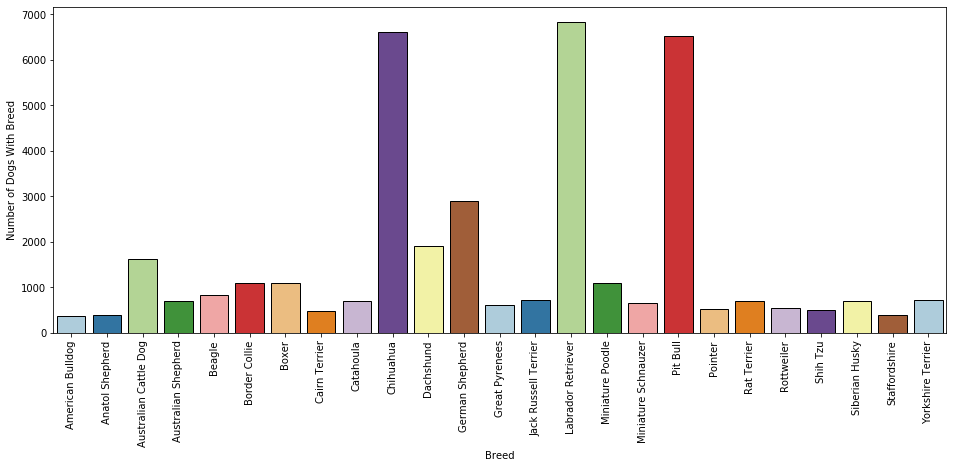

In [38]:
plt.figure(figsize=(16,6))
sns.barplot(x=top_25_breed_df.groupby('breed').count().index, 
            y=top_25_breed_df.groupby('breed').count()['breed_name'], 
            data=top_25_breed_df.groupby('breed').count(), palette='Paired', 
            ec='black')
plt.xlabel('Breed')
plt.ylabel('Number of Dogs With Breed')
plt.xticks(rotation=90)

Using a t-test, I determined that 22 of the 25 common breeds had significantly different time in shelter days than the group mean ("Mean of Others" below). Of note are the adoption times for the three most common breeds: Pit Bulls and Labradors have longer adoption times, while Chihuahuas have shorter adoption times. German Shepherds also have a slightly shorter than average adoption time.

In [39]:
top_25_breeds_pval = ttest_all(top_25_breeds, top_25_breed_df, 'breed', 'time_in_shelter_days')

In [40]:
top_25_breeds_significant = top_25_breeds_pval[top_25_breeds_pval['p-value']<0.05]
top_25_breeds_significant.sort_values('Mean')

,Variable,Mean,Mean of Others,T-test Statistic,p-value
20,Shih Tzu,4.734070,9.184889,-8.196477,2.549757e-16
16,Miniature Schnauzer,4.955924,9.199810,-8.982121,2.771275e-19
11,Yorkshire Terrier,5.456601,9.196683,-8.237963,1.805399e-16
7,Miniature Poodle,5.681541,9.227157,-9.602661,8.233953e-22
15,Siberian Husky,6.754604,9.170924,-5.223624,1.763507e-07
4,Dachshund,7.005968,9.237436,-7.914849,2.540252e-15
10,Jack Russell Terrier,7.100436,9.166559,-4.573050,4.821435e-06
1,Chihuahua,7.509319,9.457111,-12.016685,3.322136e-33
23,Anatol Shepherd,7.597353,9.144108,-2.547124,1.086527e-02
9,Beagle,7.615721,9.161454,-3.675297,2.378900e-04


In [41]:
top_25_breeds_significant['Variable'].nunique()

22

I next completed a bootstrap analysis to determine if the observed means could be replicated after 10,000 replicates. I've written the following functions to complete a comparison of each variable to all other data:

In [42]:
from progressbar import ProgressBar
np.random.seed(47)
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

def bootstrap(groupa, groupb):
    
    mean_diff = np.mean(groupa) - np.mean(groupb)
    
    bs_replicates_a = draw_bs_reps(groupa, np.mean, size=10000)
    bs_replicates_b = draw_bs_reps(groupb, np.mean, size=10000)
    
    bs_diff_replicates = bs_replicates_a - bs_replicates_b
    
    conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])
    
    # Compute mean of combined data set: combined_mean
    combined_mean = np.mean(np.concatenate([groupa, groupb]))

    # Shift the samples
    shifted_a = groupa - np.mean(groupa) + combined_mean
    shifted_b = groupb - np.mean(groupb) + combined_mean

    # Get bootstrap replicates of shifted data sets
    bs_replicates_a_shifted = draw_bs_reps(shifted_a, np.mean, 10000)
    bs_replicates_b_shifted = draw_bs_reps(shifted_b, np.mean, 10000)

    # Compute replicates of difference of means: bs_diff_replicates
    bs_diff_replicates_shifted = bs_replicates_a_shifted - bs_replicates_b_shifted

    # Compute the p-value for significantly higher values
    p_high = np.sum(bs_diff_replicates_shifted >= mean_diff) / len(bs_diff_replicates_shifted)
   
    # Compute the p-value for significantly lower values
    p_low = np.sum(bs_diff_replicates_shifted <= mean_diff) / len(bs_diff_replicates_shifted)
    
    return mean_diff, conf_int, p_high, p_low

def bootstrap_all(categorical_list, df_name, categorical_variable, test_variable):
    #similar to ttest_all - compare data for each variable in categorical_list to all other data
    
    pbar = ProgressBar() 
    df_list = []
    for i in pbar(categorical_list):
        others = df_name[df_name[categorical_variable]!=i].dropna(subset=[test_variable])
        i_var = df_name[df_name[categorical_variable]==i].dropna(subset=[test_variable])
        i_mean = np.mean(i_var[test_variable])
        o_mean = np.mean(others[test_variable])
        meandiff, conf_int, p_high, p_low = bootstrap(i_var[test_variable], others[test_variable])
        df_list.append([i, i_mean, o_mean, meandiff, conf_int, p_high, p_low])

    pval = pd.DataFrame(df_list)
    pval.columns = ['Variable', 'Mean', 'Mean of Others', 'Mean Difference', '95% CI', 'p-value_high', 'p-value_low']
    return pval

In [43]:
top_25_breeds_bootstrap = bootstrap_all(top_25_breeds, top_25_breed_df, 'breed', 'time_in_shelter_days')

100% |########################################################################|


In [44]:
top_25_breeds_bootstrap.dropna(subset=['Mean'], inplace=True)
top_25_breeds_bootstrap[(top_25_breeds_bootstrap['p-value_high']<0.05)|(top_25_breeds_bootstrap['p-value_low']<0.05)]

,Variable,Mean,Mean of Others,Mean Difference,95% CI,p-value_high,p-value_low
0,Labrador Retriever,9.870826,8.971716,0.899110,"[0.5625058065667636, 1.2420133695071707]",0.0000,1.0000
1,Chihuahua,7.509319,9.457111,-1.947793,"[-2.217165572620566, -1.6748399636756885]",1.0000,0.0000
2,Pit Bull,11.885274,8.578352,3.306922,"[2.925418523398046, 3.6793220309462162]",0.0000,1.0000
3,German Shepherd,8.579918,9.172097,-0.592179,"[-1.0040804636459675, -0.16337963859891913]",0.9971,0.0029
4,Dachshund,7.005968,9.237436,-2.231468,"[-2.6496537195879215, -1.7926033645022483]",1.0000,0.0000
5,Australian Cattle Dog,10.648964,9.062861,1.586103,"[0.972655837694978, 2.2042317439131143]",0.0000,1.0000
7,Miniature Poodle,5.681541,9.227157,-3.545616,"[-4.029160560363749, -3.043996108423577]",1.0000,0.0000
8,Boxer,11.766114,9.052963,2.713150,"[1.872811366050448, 3.593165954520292]",0.0000,1.0000
9,Beagle,7.615721,9.161454,-1.545734,"[-2.233159107857921, -0.8359324647916728]",1.0000,0.0000
10,Jack Russell Terrier,7.100436,9.166559,-2.066123,"[-2.7132340231765184, -1.4124878146768787]",1.0000,0.0000


#### Of our 4 most common breeds, Labs and Pit Bulls do have significantly longer adoption times; however, Chihuahuas and German Shephereds do not.

## 1c. Do certain breed groups have longer adoption times?

#### AKC groupings include the Hound Group, Terrier Group, Working Group, Herding Group, Sporting Group, Non-Sporting Group, Toy Group, and Miscellaneous
Here, I pulled data from the [AKC](https://en.wikipedia.org/wiki/List_of_dog_breeds) to categorize dog breeds into breed groups. Of note, **American Pit Bulls are not recognized by the AKC as a distinct dog breed.** 

Breed groups have histories of being bred for similar functions and traits, and here, I've hypothesized that the Working Group has longer adoption times and may be less desirable for families. 

The AKC website describes Working breeds as follows:
> They were developed to assist humans in some capacity – including pulling sleds and carts, guarding flocks and homes, and protecting their families – and many of these breeds are still used as working dogs today. Breeds in the Working Group tend to be known for imposing stature, strength, and intelligence.

More information on AKC breed groupings can be found [here](https://www.akc.org/expert-advice/lifestyle/7-akc-dog-breed-groups-explained/).

I had to rename many of the dog breeds so that the dataframes would concatenate properly. I deferred to the breed names used by the animal shelter unless that would result in more issues; for example, I renamed all 3 poodle types to just "Poodle", as the AKC does not recognize Toy, Standard, and Miniature Poodles as separate breeds.

In [45]:
dog_groups = pd.read_csv('dogbreed_categories.csv', header=0)
dog_groups = dog_groups[['Breed', 'Origin', 'American Kennel Club[4]', 'United Kennel Club[9]']]
dog_groups.dropna(subset=['Breed'], inplace=True)

breed_rename = {'Alaskan husky':'Alaskan Husky', 'American Eskimo Dog':'American Eskimo', 
                'Anatolian Shepherd Dog':'Anatol Shepherd', 'Bedlington Terrier':'Bedlington Terr', 
                'Belgian Shepherd Dog (Malinois)':'Belgian Malinois', 'Belgian Shepherd Dog (Tervuren)':'Belgian Tervuren',
                'Bichon Frisé':'Bichon Frise', 'Black and Tan Coonhound':'Black-Tan Hound',
                'Bluetick Coonhound':'Bluetick Hound', 'Bouvier des Flandres':'Bouv Flandres', 
                'Boykin Spaniel':'Boykin Span', 'Brussels Griffon':'Bruss Griffon', 'Welsh Corgi, Cardigan':'Cardigan Welsh Corgi',
                'Louisiana Catahoula Leopard Dog':'Catahoula', 'King Charles Spaniel':'Cavalier Span',
                'Chesapeake Bay Retriever':'Chesa Bay Retr', 'Chinese Crested Dog':'Chinese Crested',
                'Shar Pei':'Chinese Sharpei', 'American Cocker Spaniel':'Cocker Spaniel', 'Collie, Rough':'Collie Rough', 
                'Collie, Smooth':'Collie Smooth', 'Coton de Tulear':'Coton De Tulear', 'Dandie Dinmont Terrier':'Dandie Dinmont', 
                'Doberman Pinscher':'Doberman Pinsch', 'Dogue de Bordeaux':'Dogue De Bordeaux', 'Bulldog':'English Bulldog', 
                'American English Coonhound':'English Coonhound', 'Entlebucher Mountain Dog':'Entlebucher',
                'Flat-Coated Retriever':'Flat Coat Retriever', 'German Shorthaired Pointer':'German Pointer', 
                'German Shepherd Dog':'German Shepherd', 'Glen of Imaal Terrier':'Glen Of Imaal', 
                'Grand Basset Griffon Vendéen':'Grand Basset Griffon Vendeen', 'Kangal Shepherd Dog':'Kangal', 
                'Löwchen':'Lowchen', 'English Mastiff':'Mastiff', 'American Hairless Terrier':'Mexican Hairless',
                'Patterdale Terrier':'Patterdale Terr', 'Petit Basset Griffon Vendéen':'Pbgv', 
                'Welsh Corgi, Pembroke':'Pembroke Welsh Corgi', 'Picardy Spaniel':'Picardy Sheepdog', 
                'American Pit Bull Terrier':'Pit Bull', 'Portuguese Podengo':'Podengo Pequeno', 
                'Portuguese Water Dog':'Port Water Dog', 'Perro de Presa Canario':'Presa Canario', 
                'Lancashire Heeler':'Queensland Heeler', 'Redbone Coonhound':'Redbone Hound', 'Rhodesian Ridgeback':'Rhod Ridgeback',
                'Giant Schnauzer':'Schnauzer Giant', 'Sealyham Terrier':'Sealyham Terr', 'Fox Terrier, Smooth':'Smooth Fox Terrier',
                'Soft-Coated Wheaten Terrier':'Soft Coated Wheaten Terrier', 'Staffordshire Bull Terrier':'Staffordshire', 
                'Sussex Spaniel':'Sussex Span', 'Greater Swiss Mountain Dog':'Swiss Hound', 
                'Treeing Tennessee Brindle':'Treeing Tennesse Brindle', 'Yorkshire Terrier':'Yorkshire',
                'West Highland White Terrier':'West Highland', 'Fox Terrier, Wire':'Wire Hair Fox Terrier'
               }

dog_groups = dog_groups.replace({'Breed':breed_rename})

In [46]:
dog_breeds['breed'] = dog_breeds['breed'].str.replace('Miniature Poodle', 'Poodle')
dog_breeds['breed'] = dog_breeds['breed'].str.replace('Toy Poodle', 'Poodle')
dog_breeds['breed'] = dog_breeds['breed'].str.replace('Standard Poodle', 'Poodle')
dog_breeds['breed'] = dog_breeds['breed'].str.replace('St. Bernard Rough Coat', 'Saint Bernard')
dog_breeds['breed'] = dog_breeds['breed'].str.replace('St. Bernard Smooth Coat', 'Saint Bernard')

dog_breeds.loc[dog_breeds['breed']=='Pointer', 'breed'] = 'English Pointer'

In [47]:
breed_groups = pd.merge(left=dog_breeds, right=dog_groups, left_on='breed', right_on='Breed')

# exclude breeds that are not categorized by the AKC
AKCgroups = ['Hound Group', 'Terrier Group', 'Working Group', 'Herding Group', 
             'Sporting Group', 'Non-Sporting Group', 'Toy Group', 'Miscellaneous']
breed_groups = breed_groups[breed_groups['American Kennel Club[4]'].isin(AKCgroups)]

In [48]:
sortbreedgroup = breed_groups.groupby('American Kennel Club[4]').mean().sort_values('time_in_shelter_days', ascending=False)
sortbreedgroup = sortbreedgroup['time_in_shelter_days'].to_dict()

#### Miscellaneous breeds have the longest adoption times; however, there weren't many dogs falling into this category.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

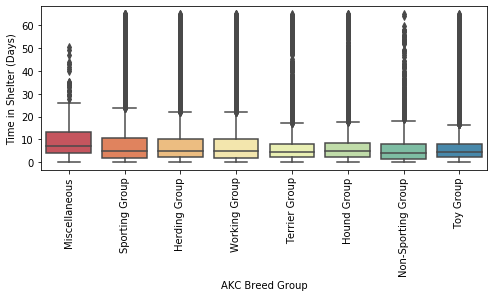

In [49]:
plt.figure(figsize=(8, 3)th)
sns.boxplot(x='American Kennel Club[4]', y='time_in_shelter_days', 
                    data=breed_groups, palette='Spectral', order=sortbreedgroup)
plt.xlabel('AKC Breed Group')
plt.ylabel('Time in Shelter (Days)')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

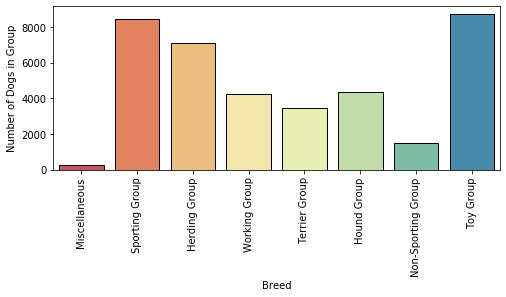

In [50]:
plt.figure(figsize=(8,3))
sns.barplot(x=breed_groups.groupby('American Kennel Club[4]').count().index, 
            y=breed_groups.groupby('American Kennel Club[4]').count()['breed_name'], 
            data=breed_groups.groupby('American Kennel Club[4]').count(), palette='Spectral', 
            order=sortbreedgroup, ec='black')
plt.xlabel('Breed')
plt.ylabel('Number of Dogs in Group')
plt.xticks(rotation=90)

Only these 3 breeds are in the Miscellaneous cateogry and represent a small number of dogs:

In [51]:
breed_groups.loc[breed_groups['American Kennel Club[4]']=='Miscellaneous', 'breed'].value_counts()

Queensland Heeler    202
Dutch Shepherd        35
Dogo Argentino        21
Name: breed, dtype: int64

In [52]:
groups_bootstrap = bootstrap_all(AKCgroups, breed_groups, 'American Kennel Club[4]', 'time_in_shelter_days')

100% |########################################################################|


In [53]:
groups_bootstrap[(groups_bootstrap['p-value_high']<0.05)|(groups_bootstrap['p-value_low']<0.05)]

,Variable,Mean,Mean of Others,Mean Difference,95% CI,p-value_high,p-value_low
0,Hound Group,7.901565,8.531067,-0.629502,"[-0.9604191605146242, -0.29114524389923657]",1.0000,0.0000
1,Terrier Group,8.041444,8.500504,-0.459060,"[-0.8597272537924344, -0.05364002993461544]",0.9901,0.0099
2,Working Group,9.031627,8.386960,0.644667,"[0.2569950438540989, 1.0336214957556509]",0.0006,0.9994
3,Herding Group,9.084883,8.315778,0.769105,"[0.4761805280099553, 1.0683415936955032]",0.0000,1.0000
4,Sporting Group,9.553319,8.147142,1.406177,"[1.1142513524764186, 1.7050342377900805]",0.0000,1.0000
5,Non-Sporting Group,7.497637,8.498383,-1.000746,"[-1.535374255902749, -0.4552516891724563]",0.9999,0.0001
6,Toy Group,7.147801,8.849222,-1.701421,"[-1.9452381866622188, -1.464148393511542]",1.0000,0.0000
7,Miscellaneous,10.890795,8.442444,2.448350,"[1.1844082412038153, 3.7734894214928736]",0.0000,1.0000


Based on this bootstrap, we see that **Working, Herding, Sporting, and Miscellaneous Group** dogs have significantly longer adoption times. Terriers, Hounds, Non-Sporting and Toy breeds all appear to have shorter adoption times. **Sporting** breed dogs appear to have the longest adoption times, and this group includes Labraodor Retrievers, which is one of the most commonly occurring breeds.

In [54]:
breed_groups.loc[breed_groups['American Kennel Club[4]']=='Sporting Group', 'breed'].value_counts()

Labrador Retriever                    6830
English Pointer                        554
Golden Retriever                       308
Cocker Spaniel                         238
Flat Coat Retriever                     97
Weimaraner                              83
Vizsla                                  72
German Pointer                          61
Brittany                                47
Chesa Bay Retr                          25
English Springer Spaniel                23
Nova Scotia Duck Tolling Retriever      14
German Wirehaired Pointer               11
Field Spaniel                           10
Irish Setter                             9
Wirehaired Pointing Griffon              9
Boykin Span                              8
English Setter                           7
English Cocker Spaniel                   7
Welsh Springer Spaniel                   6
Spinone Italiano                         3
Sussex Span                              2
Gordon Setter                            2
Name: breed

## 1d. Is there an effect of being mixed breed or purebred on adoption times?

Here, I hypothesized that mixed breed dogs have longer adoption times than purebred dogs.

Text(0, 0.5, 'Time in Shelter (Days)')

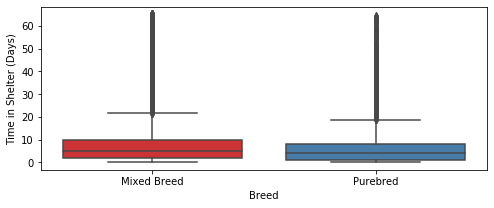

In [55]:
plt.figure(figsize=(8,3))
sns.boxplot(x='mixed_breed', y='time_in_shelter_days', 
                    data=dog_breeds, palette='Set1')
plt.xlabel('Breed')
plt.ylabel('Time in Shelter (Days)')

Mixed breed dogs are far more common than purebred dogs.

Text(0, 0.5, 'Number of Dogs in Group')

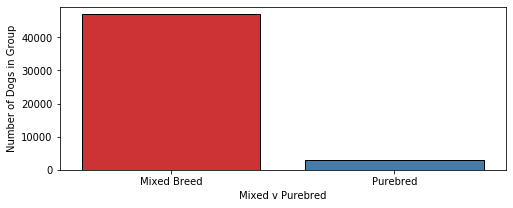

In [56]:
plt.figure(figsize=(8, 3))
sns.barplot(x=dog_breeds.groupby('mixed_breed').count().index, 
            y=dog_breeds.groupby('mixed_breed').count()['breed_name'], 
            data=dog_breeds.groupby('mixed_breed').count(), palette='Set1', 
            ec='black')
plt.xlabel('Mixed v Purebred')
plt.ylabel('Number of Dogs in Group')

In [57]:
mixed_breed = dog_breeds[dog_breeds['mixed_breed']=='Mixed Breed']
purebred = dog_breeds[dog_breeds['mixed_breed']=='Purebred']
np.mean(mixed_breed['time_in_shelter_days']), np.mean(purebred['time_in_shelter_days']), stats.ttest_ind(mixed_breed['time_in_shelter_days'], purebred['time_in_shelter_days'])

(9.012789982904614,
 7.4017536704730915,
 Ttest_indResult(statistic=7.323141304499771, pvalue=2.4587469910872337e-13))

In [58]:
bootstrap(mixed_breed['time_in_shelter_days'], purebred['time_in_shelter_days'])

(1.6110363124315228, array([1.23415582, 1.98452465]), 0.0, 1.0)

#### From the t-test, we can see that mixed breed dogs have significantly longer adoption times than purebreed dogs.

## 1e. Do older dogs have a harder time getting adopted than puppies?

My hypothesis here is that puppies are adopted significantly faster than adult dogs, especially in the case of dogs >2.5 years old.


<img src="https://www.thelabradorsite.com/wp-content/uploads/2018/05/introducing-puppy-to-older-dog-header-696x377.jpg" width=300px align="left">
<br><br><br><br><br><br><br><br><br>

[Image Credit](https://www.thelabradorsite.com/introducing-puppy-to-older-dog/)

Age is not a continuous variable in this dataset. Even when analyzed by age in days, its rounded up to the year.

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.,  8000.]), <a list of 10 Text xticklabel objects>)

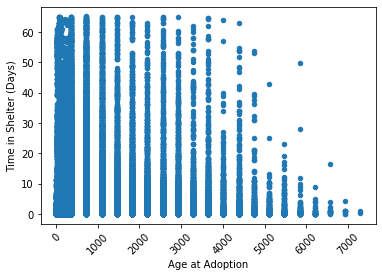

In [59]:
dogs.plot(x='age_upon_outcome_(days)', y='time_in_shelter_days', kind='scatter')
plt.xlabel('Age at Adoption')
plt.ylabel('Time in Shelter (Days)')
plt.xticks(rotation=45)

#### Older dogs do not have longer adoption times overall; however, dogs <2.5 years old have a slight advantage over dogs between 2.5 - 5 years old.
Some of this effect may be due to fewer older animals in the shelter: there is less data for older dogs than for young ones.

In [60]:
dogs['age_group'] = dogs['age_upon_outcome_age_group'].str[1:-1]
dogs['age_group'] = dogs['age_group'].str.replace(', ','-')

Text(0, 0.5, 'Time in Shelter (Days)')

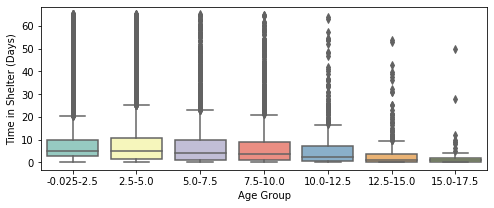

In [61]:
plt.figure(figsize=(8,3))
sns.boxplot(x='age_group', y='time_in_shelter_days', 
            data=dogs, palette='Set3',
            order=['-0.025-2.5', '2.5-5.0', '5.0-7.5',
                   '7.5-10.0', '10.0-12.5', '12.5-15.0',
                   '15.0-17.5'])
plt.xlabel('Age Group')
plt.ylabel('Time in Shelter (Days)')

Text(0, 0.5, 'Number of Dogs in Group')

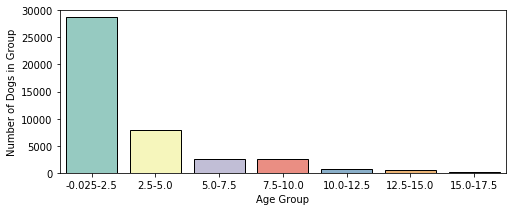

In [62]:
plt.figure(figsize=(8, 3))
sns.barplot(x=dogs.groupby('age_group').count().index, 
            y=dogs.groupby('age_group').count()['age_upon_outcome'], 
            data=dogs.groupby('age_group').count(), palette='Set3', 
            order=['-0.025-2.5', '2.5-5.0', '5.0-7.5',
                   '7.5-10.0', '10.0-12.5', '12.5-15.0',
                   '15.0-17.5'], ec='black')
plt.xlabel('Age Group')
plt.ylabel('Number of Dogs in Group')

In [63]:
age_groups = ['-0.025-2.5', '2.5-5.0', '5.0-7.5',
              '7.5-10.0', '10.0-12.5', '12.5-15.0', '15.0-17.5']
ttest_all(age_groups, dogs, 'age_group', 'time_in_shelter_days')

,Variable,Mean,Mean of Others,T-test Statistic,p-value
0,-0.025-2.5,9.199585,8.028332,9.844879,7.624462e-23
1,2.5-5.0,8.925451,8.780884,0.997573,3.184918e-01
2,5.0-7.5,7.918655,8.862937,-3.948689,7.870510e-05
3,7.5-10.0,7.285942,8.902165,-6.754618,1.450267e-11
4,10.0-12.5,5.878381,8.857807,-6.830477,8.575323e-12
5,12.5-15.0,3.385111,8.879967,-11.165742,6.573180e-29
6,15.0-17.5,2.181098,8.823730,-5.828906,5.618844e-09


In [64]:
age_groups_bootstrap = bootstrap_all(age_groups, dogs, 'age_group', 'time_in_shelter_days')

100% |########################################################################|


In [65]:
age_groups_bootstrap[(age_groups_bootstrap['p-value_high']<0.5)|(age_groups_bootstrap['p-value_low']<0.5)]

,Variable,Mean,Mean of Others,Mean Difference,95% CI,p-value_high,p-value_low
0,-0.025-2.5,9.199585,8.028332,1.171254,"[0.940655438402746, 1.4005300966454162]",0.0000,1.0000
1,2.5-5.0,8.925451,8.780884,0.144567,"[-0.13527138016769186, 0.43408929585733197]",0.1536,0.8464
2,5.0-7.5,7.918655,8.862937,-0.944282,"[-1.3926835310625094, -0.49504263587491093]",1.0000,0.0000
3,7.5-10.0,7.285942,8.902165,-1.616224,"[-2.048223289674347, -1.1844306091790433]",1.0000,0.0000
4,10.0-12.5,5.878381,8.857807,-2.979425,"[-3.6415454132909653, -2.269049590159848]",1.0000,0.0000
5,12.5-15.0,3.385111,8.879967,-5.494856,"[-6.0242399647756235, -4.926806727612016]",1.0000,0.0000
6,15.0-17.5,2.181098,8.823730,-6.642632,"[-7.558898951972414, -5.361957541816308]",1.0000,0.0000


We can see that that higher age groups do not have longer adoption times; in fact, they have significantly *shorter* adoption times, and the lowest age group has significantly higher adoption times. I'd speculate that this is also a result of the youngest group having the highest volume.

## 1f. Is Black Dog Syndrome occuring at the Austin Animal Shelter?
This phenomenon, described [here](https://en.wikipedia.org/wiki/Black_dog_syndrome), hypothesizes that black dogs are less likely to be adopted than lighter colored dogs. While this phenomenon is widely disputed, several efforts have been made to assist dark-coated dogs with adoption, including the [The Black Dog Project](https://www.fredlevyart.com/index/G00007N.NR0KFZ5I).

As with breed, many dogs had mixed coat colors: there are 337 coat color variations in this dataset. I addressed these the same way as breed, by separating mixed colors into individual columns and assigning a boolean value to each dog corresponding to whether or not the color was present.

<img src="http://blog.fredlevyart.com/wp-content/uploads/2014/02/black_dogs-11.jpg" width=300px align="left"><br><br><br><br><br><br><br><br><br><br><br><br><br>
[Image Credit](http://blog.fredlevyart.com/photos/new-blog-black-dog-project)

In [66]:
dogs['color'].nunique()

335

Dark colored dogs make up 3 of the 4 most common coat colors: Black/White, Black, and Brown/White, indicating that they may at least be more frequent in this shelter than light colored dogs.

In [67]:
dogs['color'].value_counts().head()

Black/White    4874
Black          2396
Tan/White      2315
Brown/White    2301
White          2294
Name: color, dtype: int64

In [68]:
dogs['coat_color_list'] = dogs['color'].str.split('/')
dogs.loc[dogs.coat_color_list.str.len()>1, 'multicolor'] = 'Multicolor'
dogs.loc[dogs['color'].str.contains('Tricolor'), 'multicolor'] = 'Multicolor'
dogs['multicolor'] = dogs['multicolor'].fillna('Single Color')

In [69]:
coat_colors = pd.get_dummies(dogs['coat_color_list'].apply(pd.Series).stack()).sum(level=0)

In [70]:
coat_colors_combined = pd.concat([dogs, coat_colors], axis=1)

In [71]:
coat1 = coat_colors_combined[['color', 'coat_color_list', 'multicolor', 'time_in_shelter_days']]
coat2 = coat_colors_combined.loc[:, 'Agouti':]
coat_melt = pd.concat([coat1, coat2], axis=1)
dog_coats = pd.melt(coat_melt, id_vars=['color', 'coat_color_list', 'multicolor','time_in_shelter_days'], 
                       var_name='coat_color', value_name='has_color')
dog_coats.loc[dog_coats['has_color']==1, 'colored'] = dog_coats['coat_color']
dog_coats = dog_coats.dropna()

Similarly to breed, I grouped all colors that occur <200 times into an "other colors" group.

In [72]:
common_colors = dog_coats.groupby('colored').count()
common_colors = common_colors.sort_values('has_color', ascending=False)
other_colors = common_colors.loc[common_colors['has_color']<200,:]
other_colors_list = other_colors.index.tolist()

In [73]:
dog_coats.loc[dog_coats['colored'].isin(other_colors_list), 'color_category'] = 'Other'
dog_coats.loc[~dog_coats['colored'].isin(other_colors_list), 'color_category'] = dog_coats['colored']

In [74]:
sort_color = dog_coats.groupby('color_category').mean().sort_values('time_in_shelter_days', ascending=False)
sort_color = sort_color['time_in_shelter_days'].to_dict()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

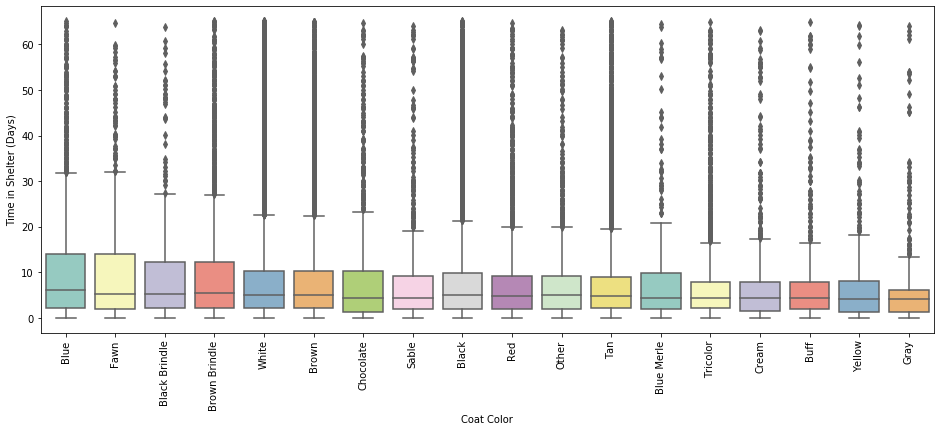

In [330]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='color_category', y='time_in_shelter_days', 
                    data=dog_coats, palette='Set3', order=sort_color)
plt.xlabel('Coat Color')
plt.ylabel('Time in Shelter (Days)')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

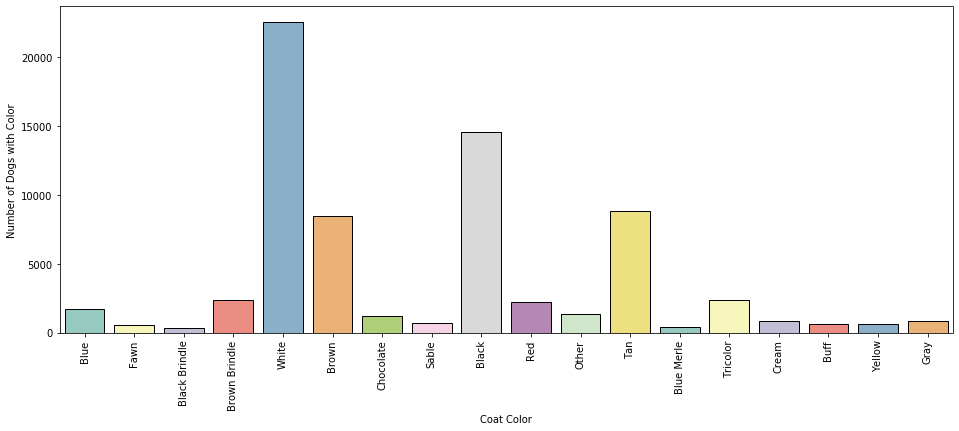

In [329]:
plt.figure(figsize=(16, 6))
sns.barplot(x=dog_coats.groupby('color_category').count().index, 
            y=dog_coats.groupby('color_category').count()['color'], 
            data=dog_coats.groupby('color_category').count(), palette='Set3', 
            order=sort_color, ec='black')
plt.xlabel('Coat Color')
plt.ylabel('Number of Dogs with Color')
plt.xticks(rotation=90)

In [77]:
color_list = dog_coats['color_category'].unique()
pval = ttest_all(color_list, dog_coats, 'color_category', 'time_in_shelter_days')
pval[pval['p-value']<0.05]

,Variable,Mean,Mean of Others,T-test Statistic,p-value
0,Other,8.227606,8.975726,-2.285402,2.229220e-02
1,Black,8.730628,9.021705,-2.648178,8.094497e-03
2,Black Brindle,10.779529,8.953867,2.673845,7.500439e-03
3,Blue,11.404227,8.900568,8.688094,3.762740e-18
6,Brown Brindle,10.754490,8.899288,7.520020,5.541284e-14
7,Buff,7.255448,8.977497,-3.697214,2.181438e-04
9,Cream,7.564577,8.978363,-3.435728,5.913039e-04
10,Fawn,11.238519,8.944105,4.493679,7.011400e-06
11,Gray,5.731094,8.999925,-7.908931,2.633419e-15
12,Red,8.332018,8.982081,-2.550088,1.077167e-02


In [78]:
coats_bootstrap = bootstrap_all(color_list, dog_coats, 'color_category', 'time_in_shelter_days')

100% |########################################################################|


In [79]:
coats_bootstrap[(coats_bootstrap['p-value_high']<0.05)|(coats_bootstrap['p-value_low']<0.05)]

,Variable,Mean,Mean of Others,Mean Difference,95% CI,p-value_high,p-value_low
0,Other,8.227606,8.975726,-0.748120,"[-1.3305208656988887, -0.1653048350016353]",0.9952,0.0048
1,Black,8.730628,9.021705,-0.291076,"[-0.4959952299653191, -0.07274884281511447]",0.9972,0.0028
2,Black Brindle,10.779529,8.953867,1.825662,"[0.31617136573530175, 3.4194065654002275]",0.0141,0.9859
3,Blue,11.404227,8.900568,2.503658,"[1.8338965068298654, 3.164167068487777]",0.0000,1.0000
5,Brown,9.194128,8.929840,0.264288,"[-0.011431533004280946, 0.5392010245186303]",0.0312,0.9688
6,Brown Brindle,10.754490,8.899288,1.855203,"[1.30961225525825, 2.414656497999434]",0.0000,1.0000
7,Buff,7.255448,8.977497,-1.722049,"[-2.4864911285052003, -0.9520319883827386]",1.0000,0.0000
9,Cream,7.564577,8.978363,-1.413786,"[-2.125797251100801, -0.6606519467238708]",1.0000,0.0000
10,Fawn,11.238519,8.944105,2.294413,"[1.126362096314959, 3.506345177790059]",0.0001,0.9999
11,Gray,5.731094,8.999925,-3.268831,"[-3.7956535704192627, -2.701643528315435]",1.0000,0.0000


#### Looking at all coat colors, we can see that the most notable differences are that blue, brown brindle, fawn, and white colored dogs have significantly longer adoption times, and buff, cream, gray, tan, tricolor, and yellow dogs have significantly shorter adoption times. Below, I look specifically at black dogs versus other color dogs.

In [80]:
black_dogs = dog_coats.loc[dog_coats['colored']=='Black']
other_dogs = dog_coats.loc[dog_coats['colored']!='Black']
bootstrap(black_dogs['time_in_shelter_days'], other_dogs['time_in_shelter_days'])

(-0.29107632505627556, array([-0.50446   , -0.07858308]), 0.996, 0.004)

In [81]:
stats.ttest_ind(black_dogs['time_in_shelter_days'], other_dogs['time_in_shelter_days'])

Ttest_indResult(statistic=-2.648177635470513, pvalue=0.008094497268416908)

In [82]:
black_dogs['time_in_shelter_days'].mean(), other_dogs['time_in_shelter_days'].mean()

(8.730628278738505, 9.021704603794781)

#### If we look specifically at black dogs versus other coat colors, we can see they have a slightly *shorter* adoption time. In most dogs, we don't see Black Dog Syndrome at this shelter.

## 1g. Does being multicolor versus single colored have an effect on adoption time?
Related to Black Dog Syndrome, we can look to see if potential dog parents are more likely to adopt dogs that are single or multicolor.

I hypothesize that single color dogs are more likely to be adopted quickly because they can more closely resemble purebred dogs.

Text(0, 0.5, 'Time in Shelter (Days)')

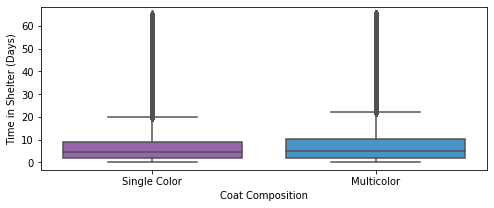

In [83]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
plt.figure(figsize=(8, 3))
sns.boxplot(x='multicolor', y='time_in_shelter_days',
                    data=dog_coats, palette=flatui)
plt.xlabel('Coat Composition')
plt.ylabel('Time in Shelter (Days)')

Text(0, 0.5, 'Number of Dogs')

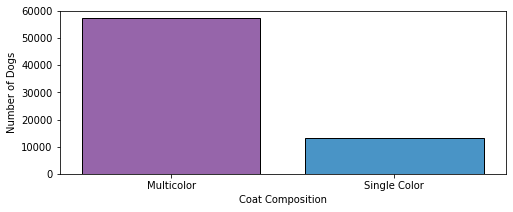

In [84]:
plt.figure(figsize=(8, 3))
sns.barplot(x=dog_coats.groupby('multicolor').count().index, 
            y=dog_coats.groupby('multicolor').count()['color'], 
            data=dog_coats.groupby('multicolor').count(), palette=flatui, 
            ec='black')
plt.xlabel('Coat Composition')
plt.ylabel('Number of Dogs')

In [85]:
multicolor = dog_coats.loc[dog_coats['multicolor']=='Multicolor', 'time_in_shelter_days']
singlecolor = dog_coats.loc[dog_coats['multicolor']=='Single Color', 'time_in_shelter_days']
np.mean(multicolor), np.mean(singlecolor), stats.ttest_ind(multicolor, singlecolor)

(9.141465544736665,
 8.187955489651387,
 Ttest_indResult(statistic=8.3895179651344, pvalue=4.970152168158832e-17))

In [86]:
bootstrap(multicolor, singlecolor)

(0.9535100550852782, array([0.74270163, 1.16850695]), 0.0, 1.0)

#### Mulitcolor dogs have a significantly longer adoption time than single color dogs.

# 2. Long adoption times
This analysis looks only at animals with adoption times in the top 5th percentile of adoption times to attempt to determine patterns that make animals high-risk for having a long adoption time. Long adoption times are considered >71 days for most animals and >65 days for dogs specifically (the focus of most of the analysis).

## 2a. What animal types are most likely to spend an unusal amount of time in the shelter?
For this section, we look at animal types in the top 5th percentile of adoption times.

In [87]:
df.time_in_shelter_days.quantile(0.95)

71.10902777777778

Text(0, 0.5, 'Time in Shelter (Days)')

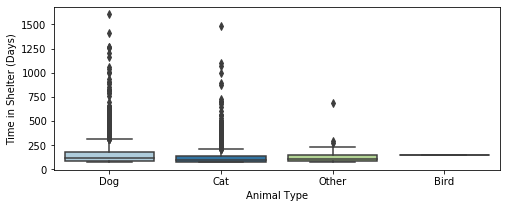

In [88]:
df_outliers = df.loc[df['time_in_shelter_days'] > (df.time_in_shelter_days.quantile(0.95)),:]

plt.figure(figsize=(8,3))
sns.boxplot(x='animal_type', y='time_in_shelter_days', palette='Paired', data=df_outliers)
plt.xlabel('Animal Type')
plt.ylabel('Time in Shelter (Days)')

There is still a long tail on the data, for dogs and cats especially.

Text(0, 0.5, 'Number of Animals')

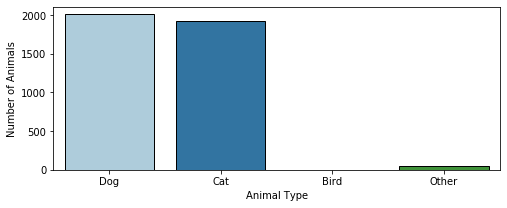

In [89]:
plt.figure(figsize=(8, 3))
sns.barplot(x=df_outliers.groupby('animal_type').count().index, 
            y=df_outliers.groupby('animal_type').count()['age_upon_outcome'], 
            data=df_outliers.groupby('animal_type').count(), palette='Paired', 
            ec='black', order=['Dog', 'Cat', 'Bird', 'Other'])
plt.xlabel('Animal Type')
plt.ylabel('Number of Animals')

## 2b - 2g. Trends in adoption times for dogs with long adoption times
Here, we repeat the above analyses for dogs in the top 5th percentile of adoption times. For dogs, we set the outlier cutoff at 65 days.

In [90]:
dog_outliers_cutoff = df.loc[df['animal_type']=='Dog', 'time_in_shelter_days'].quantile(0.95)
dog_outliers_cutoff

65.10583333333332

In [91]:
dog_outliers = df[df['animal_type'] == 'Dog']
dog_outliers = dog_outliers[dog_outliers['time_in_shelter_days']>=dog_outliers_cutoff]

In [92]:
dog_outliers['breed'] = dog_outliers['breed'].str.replace('Black/Tan Hound', 'Black-Tan Hound')
dog_outliers['breed'] = dog_outliers['breed'].str.replace(' Shorthair', '')
dog_outliers['breed'] = dog_outliers['breed'].str.replace(' Longhair', '')
dog_outliers['breed_nomix'] = dog_outliers['breed'].str.replace(' Mix', '')
dog_outliers['breed_list'] = dog_outliers['breed_nomix'].str.split('/')
dog_outliers.loc[dog_outliers.breed_list.str.len()>1, 'mixed_breed'] = 'Mixed Breed'
dog_outliers.loc[dog_outliers['breed'].str.contains('Mix'), 'mixed_breed'] = 'Mixed Breed'
dog_outliers['mixed_breed'] = dog_outliers['mixed_breed'].fillna('Purebred')

has_breeds_outliers = pd.get_dummies(dog_outliers['breed_list'].apply(pd.Series).stack()).sum(level=0)

breeds_combined_outliers = pd.concat([dog_outliers, has_breeds_outliers], axis=1)

In [93]:
outlier_melt1 = breeds_combined_outliers[['breed_list', 'mixed_breed', 'time_in_shelter_days']]
outlier_melt2 = breeds_combined_outliers.loc[:, 'Akita':]
outlier_melt = pd.concat([outlier_melt1, outlier_melt2], axis=1)
breed_outliers = pd.melt(outlier_melt, id_vars=['breed_list','mixed_breed','time_in_shelter_days'], var_name='breed_name', value_name='has_breed')
breed_outliers.loc[breed_outliers['has_breed']==1, 'breed'] = breed_outliers['breed_name']
breed_outliers = breed_outliers.dropna()

## 2b. Are certain breeds more likely to have long adoption times?

As before, there are many cases where animals only appear once or a few times in the data. I again used the 25 most common breeds v. others.

In [94]:
other_breeds_list_outliers = breed_outliers['breed'].value_counts().head(25).index.to_list()
other_breeds_list_outliers

['Pit Bull',
 'Labrador Retriever',
 'Chihuahua',
 'Australian Cattle Dog',
 'German Shepherd',
 'Boxer',
 'Catahoula',
 'Staffordshire',
 'American Bulldog',
 'Border Collie',
 'American Staffordshire Terrier',
 'Pointer',
 'American Pit Bull Terrier',
 'Australian Kelpie',
 'Plott Hound',
 'Jack Russell Terrier',
 'Rottweiler',
 'Beagle',
 'Chinese Sharpei',
 'Black Mouth Cur',
 'Rat Terrier',
 'Dachshund',
 'Australian Shepherd',
 'Siberian Husky',
 'Great Pyrenees']

In [95]:
breed_outliers.loc[~breed_outliers['breed'].isin(other_breeds_list_outliers), 'breed_category'] = 'Other'
breed_outliers.loc[breed_outliers['breed'].isin(other_breeds_list_outliers), 'breed_category'] = breed_outliers['breed']

In [96]:
sortgroup_outliers = breed_outliers.groupby('breed_category').mean().sort_values('time_in_shelter_days', ascending=False)
sortgroup_outliers = sortgroup_outliers['time_in_shelter_days'].to_dict()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

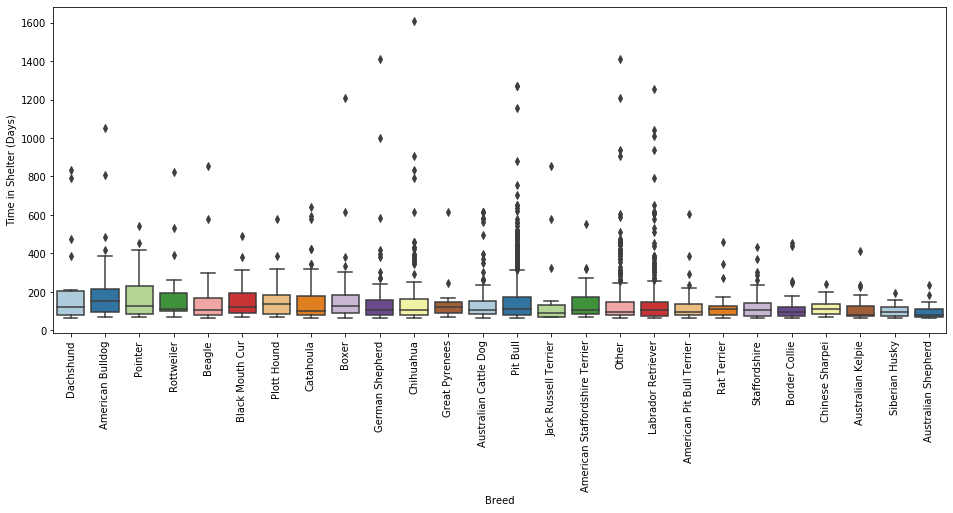

In [97]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='breed_category', y='time_in_shelter_days', 
                    data=breed_outliers, palette='Paired', order=sortgroup_outliers)
plt.xlabel('Breed')
plt.ylabel('Time in Shelter (Days)')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

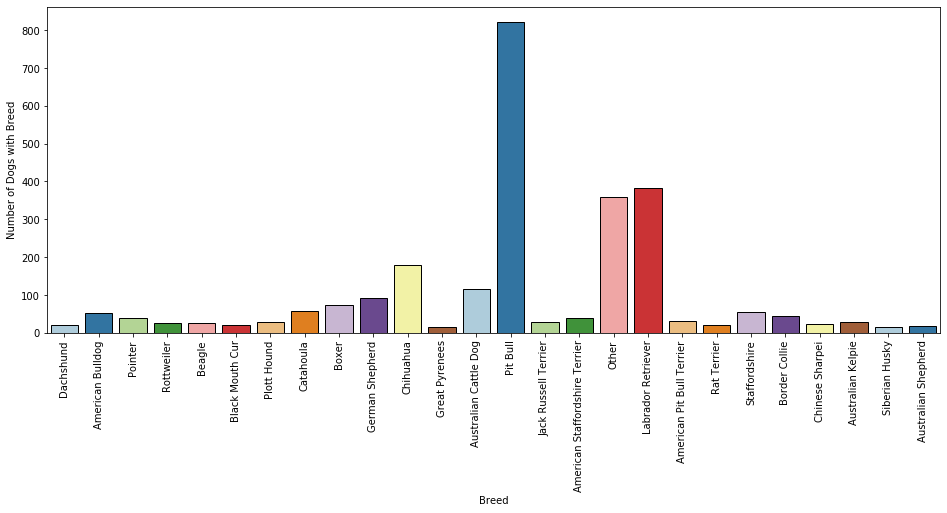

In [98]:
plt.figure(figsize=(16, 6))
sns.barplot(x=breed_outliers.groupby('breed_category').count().index, 
            y=breed_outliers.groupby('breed_category').count()['breed'], 
            data=breed_outliers.groupby('breed_category').count(), palette='Paired', 
            ec='black',order=sortgroup_outliers)
plt.xlabel('Breed')
plt.ylabel('Number of Dogs with Breed')
plt.xticks(rotation=90)

One notable trend here is that Pit Bulls are by far the most common dog in this outlier group.

In [99]:
outlier_breeds_list = breed_outliers['breed_category'].unique()
outlier_breed_bootstrap = bootstrap_all(outlier_breeds_list, breed_outliers, 'breed_category', 'time_in_shelter_days')

100% |########################################################################|


In [100]:
outlier_breed_bootstrap[outlier_breed_bootstrap['p-value_high']<0.05]

,Variable,Mean,Mean of Others,Mean Difference,95% CI,p-value_high,p-value_low
1,American Bulldog,200.275773,150.105808,50.169965,"[7.040928879200036, 102.81638055368741]",0.0297,0.9703


Bulldogs had the longest adoption times of this group; however, if we look at *probability*, there is a 1/3 chance that a dog in this extreme group will be a Pit Bull. Below, I complete a bootstrap with 10,000 replicates to demonstrate that this probability is replicable.

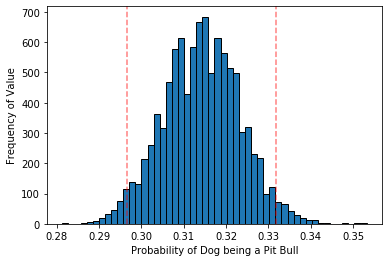

In [101]:
np.random.seed(47)
size = 10000
data = breed_outliers['breed']

# Observed probability
prob = len(breed_outliers[breed_outliers['breed']=='Pit Bull'])/len(breed_outliers)

# Initialize array of replicates: bs_replicates
bs_replicates = np.empty(size)

# Generate replicates
for i in range(size):
    sample = np.random.choice(data, size=len(data))
    bs_replicates[i] = len(sample[sample=='Pit Bull'])/len(sample)

conf_int = np.percentile(bs_replicates, [2.5, 97.5])

plt.hist(bs_replicates, bins=50, color='tab:blue', ec='black')
plt.axvline(conf_int[0], color='red', alpha=0.5, linestyle='--')
plt.axvline(conf_int[1], color='red', alpha=0.5, linestyle='--')
_ = plt.xlabel('Probability of Dog being a Pit Bull')
_ = plt.ylabel('Frequency of Value')

## 2c. Are there higher adoption times for certain breed groups? Are certain groups more highly represented in this long adoption subset?

In [102]:
breed_groups_outliers = pd.merge(left=breed_outliers, right=dog_groups, left_on='breed', right_on='Breed')
breed_groups_outliers = breed_groups_outliers[breed_groups_outliers['American Kennel Club[4]'].isin(AKCgroups)]

In [103]:
sortbreedgroup_outliers = breed_groups_outliers.groupby('American Kennel Club[4]').mean().sort_values('time_in_shelter_days', ascending=False)
sortbreedgroup_outliers = sortbreedgroup_outliers['time_in_shelter_days'].to_dict()

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

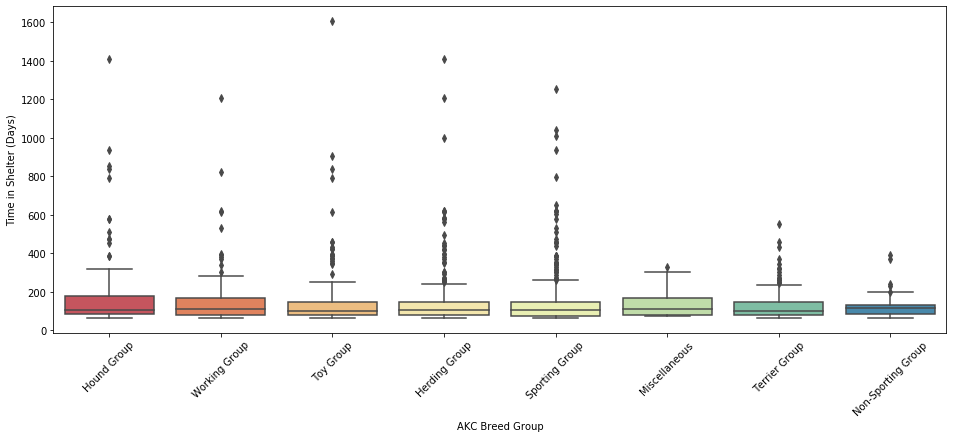

In [104]:
plt.figure(figsize=(16,6))
sns.boxplot(x='American Kennel Club[4]', y='time_in_shelter_days', 
            data=breed_groups_outliers, palette='Spectral', order=sortbreedgroup_outliers)
plt.xlabel('AKC Breed Group')
plt.ylabel('Time in Shelter (Days)')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

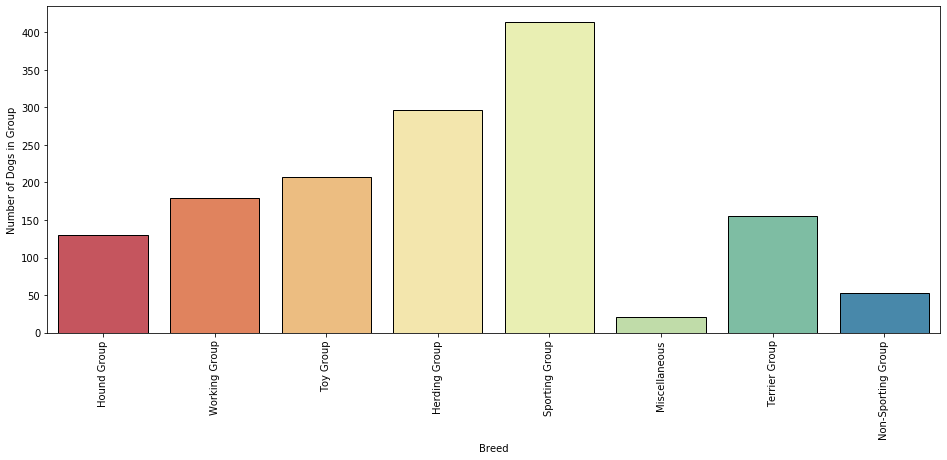

In [105]:
plt.figure(figsize=(16, 6))
sns.barplot(x=breed_groups_outliers.groupby('American Kennel Club[4]').count().index, 
            y=breed_groups_outliers.groupby('American Kennel Club[4]').count()['breed_name'], 
            data=breed_groups_outliers.groupby('American Kennel Club[4]').count(), palette='Spectral', 
            order=sortbreedgroup_outliers, ec='black')
plt.xlabel('Breed')
plt.ylabel('Number of Dogs in Group')
plt.xticks(rotation=90)

In [106]:
outlier_breed_groups_list = breed_groups_outliers['American Kennel Club[4]'].unique()

In [107]:
breed_group_bootstrap = bootstrap_all(outlier_breed_groups_list, breed_groups_outliers, 'American Kennel Club[4]', 'time_in_shelter_days')

100% |########################################################################|


In [108]:
breed_group_bootstrap[(breed_group_bootstrap['p-value_high']<0.05)|(breed_group_bootstrap['p-value_low']<0.05)]

,Variable,Mean,Mean of Others,Mean Difference,95% CI,p-value_high,p-value_low
0,Terrier Group,130.696116,150.199449,-19.503334,"[-33.82900885863919, -3.9433703297057052]",0.9962,0.0038
3,Hound Group,179.846405,145.013083,34.833321,"[3.0623348782889086, 71.30849353999079]",0.0323,0.9677
4,Non-Sporting Group,124.095283,149.030885,-24.935602,"[-42.07074159978021, -5.22718205088191]",0.9983,0.0017


We can see that the terrier group and non-sporting group have significantly shorter adoption times than other groups in this extreme group, and the hound group has a (slightly) significantly longer adoption time.

## 2d. Is there an effect of being mixed breed or purebred on adoption times in dogs with long adoption times?

Text(0, 0.5, 'Time in Shelter (Days)')

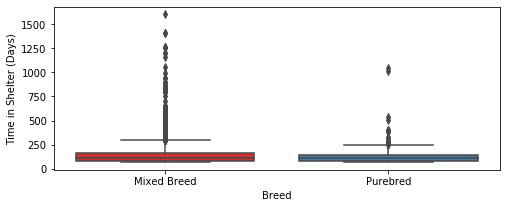

In [110]:
plt.figure(figsize=(8,3))
sns.boxplot(x='mixed_breed', y='time_in_shelter_days', 
                    data=breed_outliers, palette='Set1')
plt.xlabel('Breed')
plt.ylabel('Time in Shelter (Days)')

Text(0, 0.5, 'Number of Dogs in Group')

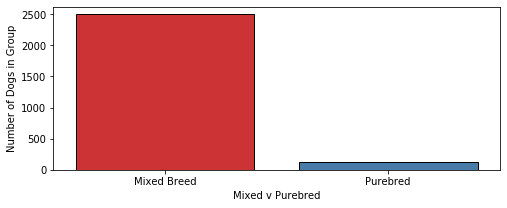

In [111]:
plt.figure(figsize=(8, 3))
sns.barplot(x=breed_outliers.groupby('mixed_breed').count().index, 
            y=breed_outliers.groupby('mixed_breed').count()['breed_name'], 
            data=breed_outliers.groupby('mixed_breed').count(), palette='Set1', 
            ec='black')
plt.xlabel('Mixed v Purebred')
plt.ylabel('Number of Dogs in Group')

In [119]:
mixed_breed_outliers = breed_outliers.loc[breed_outliers['mixed_breed']=='Mixed Breed', 'time_in_shelter_days']
purebreed_outliers =  breed_outliers.loc[breed_outliers['mixed_breed']=='Purebred', 'time_in_shelter_days']

In [120]:
bootstrap(mixed_breed_outliers, purebreed_outliers)

(2.56767388323928, array([-26.08904176,  26.81436088]), 0.4568, 0.5432)

While mixed breed dogs are far more common in this group, they do not have significantly longer adoption times.

## 2e. Is there an effect of age on longer adoption times?

In [121]:
dog_outliers['age_group'] = dog_outliers['age_upon_outcome_age_group'].str[1:-1]
dog_outliers['age_group'] = dog_outliers['age_group'].str.replace(', ','-')

Text(0, 0.5, 'Time in Shelter (Days)')

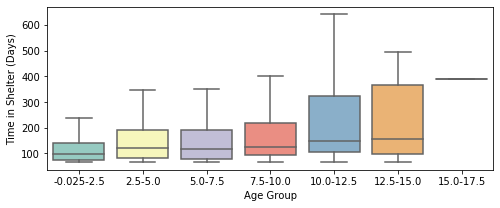

In [122]:
plt.figure(figsize=(8,3))
sns.boxplot(x='age_group', y='time_in_shelter_days', 
            data=dog_outliers, palette='Set3', 
            showfliers=False, order=['-0.025-2.5', '2.5-5.0', '5.0-7.5', 
                                     '7.5-10.0', '10.0-12.5', '12.5-15.0',
                                    '15.0-17.5'])
plt.xlabel('Age Group')
plt.ylabel('Time in Shelter (Days)')

Text(0, 0.5, 'Number of Dogs in Group')

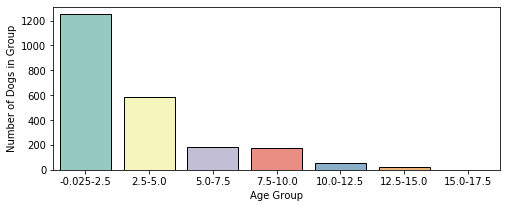

In [123]:
plt.figure(figsize=(8, 3))
sns.barplot(x=dog_outliers.groupby('age_group').count().index, 
            y=dog_outliers.groupby('age_group').count()['age_upon_outcome'], 
            data=dog_outliers.groupby('age_group').count(), palette='Set3', 
            ec='black', order=['-0.025-2.5', '2.5-5.0', '5.0-7.5',
                               '7.5-10.0', '10.0-12.5', '12.5-15.0',
                               '15.0-17.5'])
plt.xlabel('Age Group')
plt.ylabel('Number of Dogs in Group')

In [124]:
age_groups = ['-0.025-2.5', '2.5-5.0', '5.0-7.5',
              '7.5-10.0', '10.0-12.5', '12.5-15.0', '15.0-17.5']
age_groups_outlier_bootstrap = bootstrap_all(age_groups, dog_outliers, 'age_group', 'time_in_shelter_days')

100% |########################################################################|


In [125]:
age_groups_outlier_bootstrap[(age_groups_outlier_bootstrap['p-value_high']<0.5)|(age_groups_outlier_bootstrap['p-value_low']<0.5)]

,Variable,Mean,Mean of Others,Mean Difference,95% CI,p-value_high,p-value_low
0,-0.025-2.5,127.059345,179.340344,-52.280999,"[-63.75263095226997, -41.27642510116484]",1.0000,0.0000
1,2.5-5.0,176.240507,141.641078,34.599429,"[20.017599613908494, 49.6507625584766]",0.0000,1.0000
2,5.0-7.5,152.083202,150.430491,1.652711,"[-13.701570211109113, 18.282477190652514]",0.4149,0.5851
3,7.5-10.0,190.881805,147.108339,43.773465,"[20.917208374774273, 69.36299329074336]",0.0003,0.9997
4,10.0-12.5,250.258595,148.177151,102.081444,"[47.4818912236397, 164.2007873682514]",0.0010,0.9990
5,12.5-15.0,210.492614,149.974826,60.517787,"[7.638344482106864, 118.63425063946097]",0.0183,0.9817
6,15.0-17.5,389.091667,150.456429,238.635238,"[233.1320901308053, 244.03281893004106]",0.0000,1.0000


In dogs that have longer adoption times, younger dogs have significantly shorter adoption times, while dogs 2.5=5 years old and senior-aged dogs (aged 15+) have significantly longer adoption times. 

## 2f. Is Black Dog Syndrome more prevalent in dogs with long adoption times?
As before, I parsed mixed coat colors to look at individual colors separately.

In [138]:
dog_outliers['coat_color_list'] = dog_outliers['color'].str.split('/')
dog_outliers.loc[dog_outliers.coat_color_list.str.len()>1, 'multicolor'] = 'Multicolor'
dog_outliers.loc[dog_outliers['color'].str.contains('Tricolor'), 'multicolor'] = 'Multicolor'
dog_outliers['multicolor'] = dog_outliers['multicolor'].fillna('Single Color')
coat_colors_outliers = pd.get_dummies(dog_outliers['coat_color_list'].apply(pd.Series).stack()).sum(level=0)

In [139]:
coat_colors_combined_outliers = pd.concat([dog_outliers, coat_colors_outliers], axis=1)

In [140]:
coat1_outliers = coat_colors_combined_outliers[['color', 'coat_color_list', 'multicolor', 'time_in_shelter_days']]
coat2_outliers = coat_colors_combined_outliers.loc[:, 'Apricot':]
coat_melt_outliers = pd.concat([coat1_outliers, coat2_outliers], axis=1)
dog_coats_outliers = pd.melt(coat_melt_outliers, id_vars=['color', 'coat_color_list', 'multicolor','time_in_shelter_days'], 
                       var_name='coat_color', value_name='has_color')
dog_coats_outliers.loc[dog_coats_outliers['has_color']==1, 'colored'] = dog_coats_outliers['coat_color']
dog_coats_outliers = dog_coats_outliers.dropna()

Similarly to breed in this outlier group, I used quartiles to determine how to group "other" colors (less frequently occuring colors).

In [141]:
common_colors_outliers = dog_coats_outliers.groupby('colored').count()
common_colors_outliers = common_colors_outliers.sort_values('has_color', ascending=False)
other_colors_outliers = common_colors_outliers.loc[common_colors_outliers['has_color']<60,:]
other_colors_list_outliers = other_colors_outliers.index.tolist()

In [142]:
dog_coats_outliers.loc[dog_coats_outliers['colored'].isin(other_colors_list_outliers), 'color_category'] = 'Other'
dog_coats_outliers.loc[~dog_coats_outliers['colored'].isin(other_colors_list_outliers), 'color_category'] = dog_coats_outliers['colored']

In [143]:
sort_color_outliers = dog_coats_outliers.groupby('color_category').mean().sort_values('time_in_shelter_days', ascending=False)
sort_color_outliers = sort_color_outliers['time_in_shelter_days'].to_dict()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

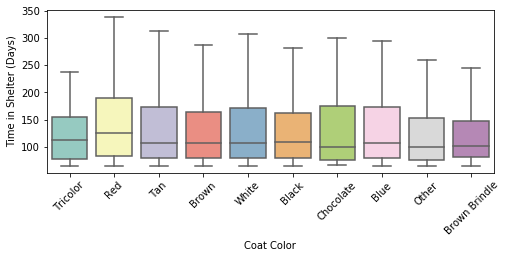

In [144]:
plt.figure(figsize=(8,3))
sns.boxplot(x='color_category', y='time_in_shelter_days',
                    data=dog_coats_outliers, palette='Set3', showfliers=False, order=sort_color_outliers)
plt.xlabel('Coat Color')
plt.ylabel('Time in Shelter (Days)')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

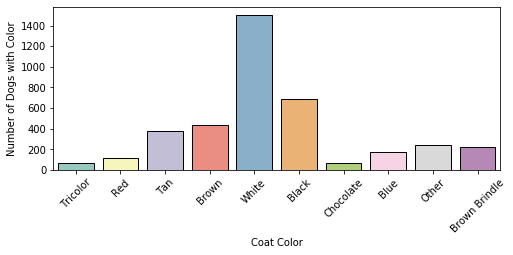

In [145]:
plt.figure(figsize=(8, 3))
sns.barplot(x=dog_coats_outliers.groupby('color_category').count().index, 
            y=dog_coats_outliers.groupby('color_category').count()['color'], 
            data=dog_coats_outliers.groupby('color_category').count(), palette='Set3', 
            order=sort_color_outliers, ec='black')
plt.xlabel('Coat Color')
plt.ylabel('Number of Dogs with Color')
plt.xticks(rotation=45)

In [146]:
color_list_outliers = dog_coats_outliers['color_category'].unique()
coats_outliers_bootstrap = bootstrap_all(color_list_outliers, dog_coats_outliers, 'color_category', 'time_in_shelter_days')

100% |########################################################################|


In [147]:
coats_outliers_bootstrap[(coats_outliers_bootstrap['p-value_high']<0.05)|(coats_outliers_bootstrap['p-value_low']<0.05)]

,Variable,Mean,Mean of Others,Mean Difference,95% CI,p-value_high,p-value_low
4,Brown Brindle,136.535466,151.562919,-15.027453,"[-27.327020535737017, -2.008484845683342]",0.991,0.009


Looking at all coat colors, we can see that the only coat color with a significant effect is Brown Brindle, which has a significantly shorter adoption time. This is particularly interesting since this coat color had a *longer* adoption time in most dogs.

In [150]:
black_dogs_outliers = dog_coats_outliers.loc[dog_coats_outliers['colored']=='Black', 'time_in_shelter_days']
other_dogs_outliers = dog_coats_outliers.loc[dog_coats_outliers['colored']!='Black', 'time_in_shelter_days']
bootstrap(black_dogs_outliers, other_dogs_outliers)

(-2.261618003636869, array([-12.81909845,   8.6838327 ]), 0.662, 0.338)

In [151]:
stats.ttest_ind(black_dogs_outliers, other_dogs_outliers)

Ttest_indResult(statistic=-0.40733489331897343, pvalue=0.6837842970790134)

In [152]:
black_dogs_outliers.mean(), other_dogs_outliers.mean()

(148.8461289482124, 151.10774695184926)

Again, we see no effect of black coat on adoption times.

## 2g. Having a single color vs. multicolor coat also does not affect adoption time in dogs with long adoption times.

Text(0, 0.5, 'Time in Shelter (Days)')

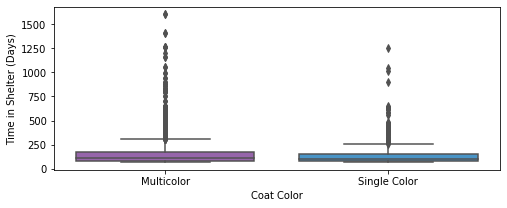

In [155]:
plt.figure(figsize=(8,3))
sns.boxplot(x='multicolor', y='time_in_shelter_days',
                    data=dog_coats_outliers, palette=flatui)
plt.xlabel('Coat Color')
plt.ylabel('Time in Shelter (Days)')

Text(0, 0.5, 'Number of Dogs')

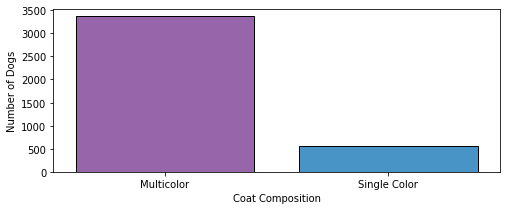

In [157]:
plt.figure(figsize=(8, 3))
sns.barplot(x=dog_coats_outliers.groupby('multicolor').count().index, 
            y=dog_coats_outliers.groupby('multicolor').count()['color'], 
            data=dog_coats_outliers.groupby('multicolor').count(), palette=flatui, 
            ec='black')
plt.xlabel('Coat Composition')
plt.ylabel('Number of Dogs')

In [161]:
multicolor_outliers = dog_coats_outliers.loc[dog_coats_outliers['multicolor']=='Multicolor', 'time_in_shelter_days']
singlecolor_outliers = dog_coats_outliers.loc[dog_coats_outliers['multicolor']=='Single Color', 'time_in_shelter_days']
np.mean(multicolor_outliers), np.mean(singlecolor_outliers), stats.ttest_ind(multicolor_outliers, singlecolor_outliers)

(151.6211732293213,
 145.16012835940634,
 Ttest_indResult(statistic=1.062764757038252, pvalue=0.28795416133056406))

In [162]:
bootstrap(multicolor_outliers, singlecolor_outliers)

(6.461044869914957, array([-5.47546234, 17.75683783]), 0.1307, 0.8693)

There is no significant effect of multicolor v. single color coats in dogs with long adoption times.

*** 
# 3. What times are pets most likely to be adopted?

In [257]:
times = df.set_index('outcome_datetime')
times = times.sort_index()
times['adoption_count'] = 1
all_times = times['adoption_count']

In [230]:
cat_times = times.loc[times['animal_type']=='Cat', 'adoption_count']
dog_times = times.loc[times['animal_type']=='Dog', 'adoption_count']

## 3a. Adoption Trends by Season
Here, I've examined whether pets are more likely to be adopted in certain seasons.

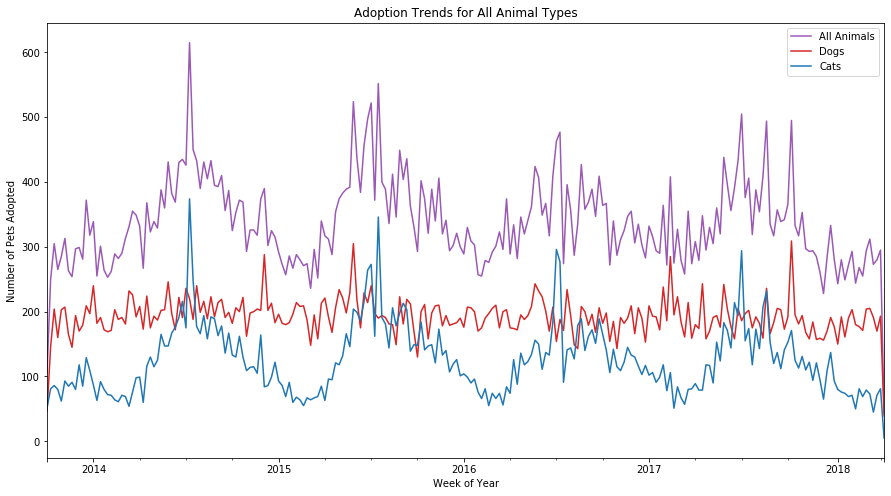

In [231]:
plt.figure(figsize=(15,8))
all_times.resample('1W').count().plot()
dog_times.resample('1W').count().plot(color='tab:red')
cat_times.resample('1W').count().plot(color='tab:blue')
plt.title('Adoption Trends for All Animal Types')
plt.xlabel('Week of Year')
plt.ylabel('Number of Pets Adopted')
plt.legend(['All Animals', 'Dogs', 'Cats'])

#### Interestingly, dogs do not have a notable pattern throughout the year for adoption times, but we see a large spike in adoptions for cats in the summer.

## 3b. Adoption Trends by Time of Day
I examined whether certain times of the day have higher average adoption rates here for all animals, cats, and dogs.

In [278]:
perhour = all_times.groupby([all_times.index.date, all_times.index.hour]).sum()
perhour = perhour.reset_index()
perhour = perhour.groupby('outcome_datetime').mean()

perhour_dogs = dog_times.groupby([dog_times.index.date, dog_times.index.hour]).sum()
perhour_dogs = perhour_dogs.reset_index()
perhour_dogs = perhour_dogs.groupby('outcome_datetime').mean()

perhour_cats = cat_times.groupby([cat_times.index.date, cat_times.index.hour]).sum()
perhour_cats = perhour_cats.reset_index()
perhour_cats = perhour_cats.groupby('outcome_datetime').mean()

(0, 23)

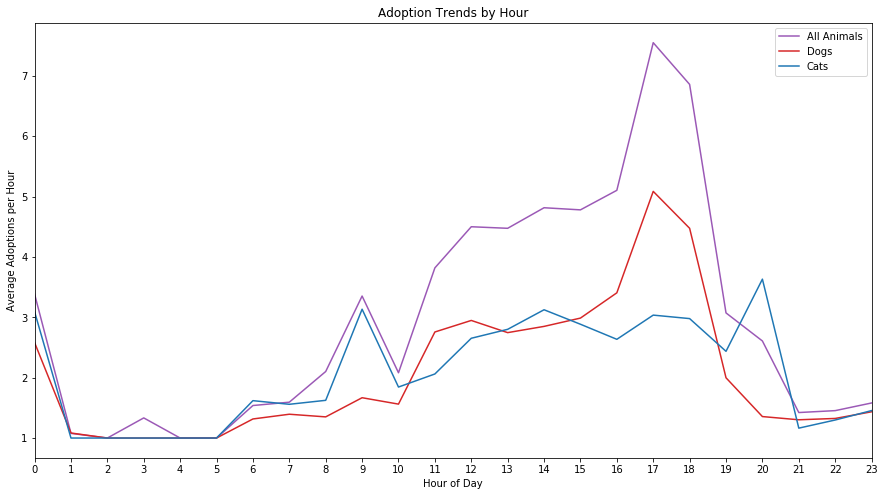

In [280]:
plt.figure(figsize=(15,8))
plt.plot(perhour)
plt.plot(perhour_dogs, color='tab:red')
plt.plot(perhour_cats, color='tab:blue')
plt.title('Adoption Trends by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Adoptions per Hour')
plt.legend(['All Animals', 'Dogs', 'Cats'])
plt.xticks(np.arange(0,25))
plt.xlim(0,23)

#### Dogs have higher adoption times flanking the standard work day, between 8-10 AM and 4-6 PM. Cats have fairly flat adoption times throughout the day.

## 3c. Adoption Times by Day of Week

In [311]:
weekdays = all_times.reset_index()
weekdays['day_of_week'] = weekdays['outcome_datetime'].dt.weekday_name
weekdays = weekdays.groupby([weekdays.outcome_datetime.dt.date,weekdays.day_of_week]).sum()
weekdays = weekdays.reset_index()

In [314]:
weekday_list = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

Text(0, 0.5, 'Adoptions per Day')

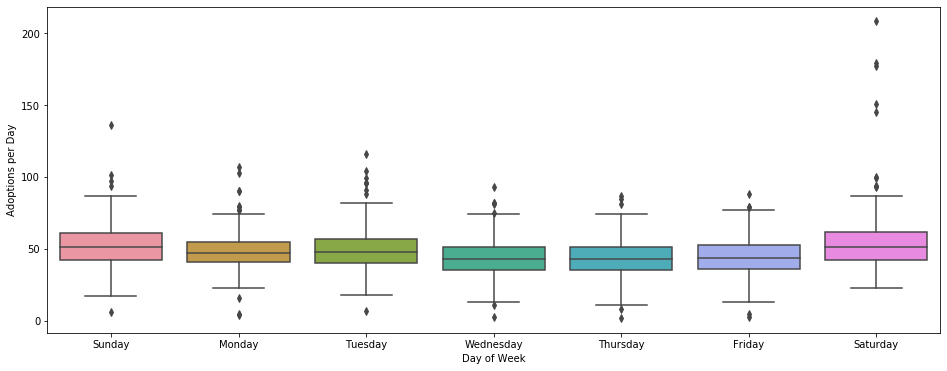

In [315]:
plt.figure(figsize=(16,6))
sns.boxplot(x=weekdays.day_of_week, 
            y=weekdays.adoption_count, order=weekday_list)
plt.xlabel('Day of Week')
plt.ylabel('Adoptions per Day')

In [320]:
weekdays_sum = weekdays.groupby('day_of_week').sum()

Text(0, 0.5, 'Number of Adoptions (Total)')

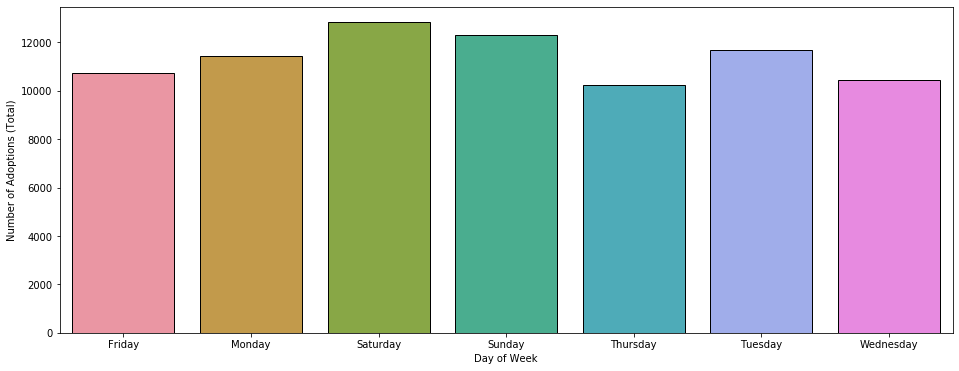

In [321]:
plt.figure(figsize=(16,6))
sns.barplot(x=weekdays_sum.index, 
            y=weekdays_sum.adoption_count, 
            ec='black')
plt.xlabel('Day of Week')
plt.ylabel('Number of Adoptions (Total)')

In [322]:
weekday_bootstrap = bootstrap_all(weekday_list, weekdays, 'day_of_week', 'adoption_count')

100% |########################################################################|


In [323]:
weekday_bootstrap

,Variable,Mean,Mean of Others,Mean Difference,95% CI,p-value_high,p-value_low
0,Sunday,52.391489,47.739192,4.652297,"[2.546858950193762, 6.822777040577832]",0.0001,0.9999
1,Monday,48.634043,48.364989,0.269053,"[-1.6994819578690203, 2.2551529019708356]",0.3947,0.6053
2,Tuesday,49.533898,48.214184,1.319714,"[-0.8085540629883415, 3.495638898906121]",0.1137,0.8863
3,Wednesday,44.493617,49.054571,-4.560954,"[-6.394645415202739, -2.6747904006514154]",1.0000,0.0000
4,Thursday,43.476596,49.223955,-5.747359,"[-7.663858211318365, -3.8502380234329023]",1.0000,0.0000
5,Friday,45.680851,48.856839,-3.175988,"[-5.043336248624033, -1.2952750425984298]",0.9996,0.0004
6,Saturday,54.608511,47.369950,7.238560,"[4.4684028228056105, 10.374624304476978]",0.0000,1.0000


#### Sunday and Saturday have significantly higher adoption rates than the other weekdays, and Wednesday through Friday have signifcantly lower adoption rates.